# Zusammenhangskomponenten-Markierung in Kacheln
Die Markierung von Objekten in Kacheln ist eine anspruchsvolle Aufgabe. Wenn dieser Schritt nicht umgangen werden kann, bietet [dask-image](http://image.dask.org/en/latest/) die richtige Funktionalität, um Beschriftungsbilder mit Beschriftungen zu erhalten, die mehrere Kacheln überqueren.

In [1]:
import numpy as np
import dask
import dask.array as da
from skimage.data import cells3d
from skimage.io import imread
from skimage.measure import label as skimage_label
import pyclesperanto_prototype as cle
from pyclesperanto_prototype import imshow
from dask_image.ndmeasure import label as daskimage_label

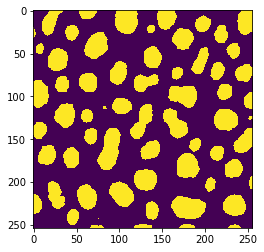

In [2]:
image = imread("../../data/blobs.tif") > 128
imshow(image)

In [3]:
tiles = da.from_array(image, chunks=(128, 128))
tiles

dask.array<array, shape=(254, 256), dtype=bool, chunksize=(128, 128), chunktype=numpy.ndarray>

Wir werden die scikit-image-Funktion `label()` zur Verarbeitung unseres Bildes verwenden.

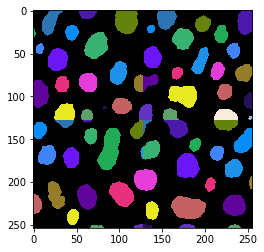

In [4]:
procedure = skimage_label

tile_map = da.map_blocks(procedure, tiles)

result = tile_map.compute()
imshow(result, labels=True)

In diesem Bild können wir bereits erkennen, dass das Ergebnis Artefakte an den Kachelgrenzen in der horizontalen und vertikalen Bildmitte aufweist. Um das Ergebnis weiter zu überprüfen, werden wir die Zusammenhangskomponenten-Markierung des Bildes ohne Kachelung berechnen.

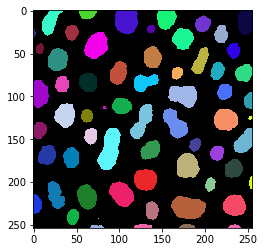

In [5]:
reference = skimage_label(image)

imshow(reference, labels=True)

Als Nächstes können wir die maximale Intensität im Beschriftungsbild vergleichen, um zu sehen, ob die Gesamtzahl der Beschriftungen in diesen beiden Bildern gleich ist. Sie sind es nicht:

In [6]:
result.max(), reference.max()

(20, 63)

Durch die Berechnung der Standardabweichung der Pixelintensität im Ergebnisbild, gruppiert nach den Referenzbeschriftungen, können wir visualisieren, welche Objekte nicht korrekt segmentiert sind.

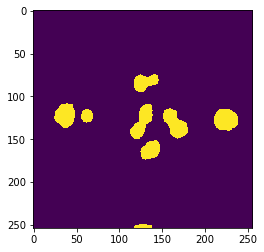

In [7]:
stddev_map = cle.standard_deviation_intensity_map(result, reference) > 0

imshow(stddev_map)

## Gekachelte Zusammenhangskomponenten-Markierung mit dask-image
Die Bildverarbeitungsbibliothek dask-image hat eine verteilte Version der Zusammenhangskomponenten-Markierung verfügbar [dask_image.ndmeasure.label](http://image.dask.org/en/latest/dask_image.ndmeasure.html?highlight=label#dask_image.ndmeasure.label):

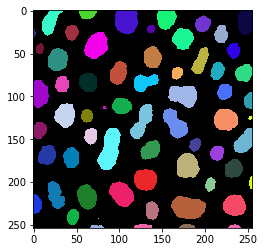

In [8]:
result_di, num_labels = daskimage_label(image)

imshow(result_di, labels=True)

Beachten Sie, dass das Ergebnis dieser Operation ein dask-Array ist, und die Berechnung des Maximums zum Beispiel nicht einfach ist:

In [9]:
result_di.max(), reference.max()

(dask.array<amax-aggregate, shape=(), dtype=int32, chunksize=(), chunktype=numpy.ndarray>,
 63)

In [10]:
np.asarray(result_di).max(), reference.max()

(63, 63)